# MIE 223 Assignment 03

### Winter 2025

In [2]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Q1

In [3]:
# DO NOT MODIFY
# laoding in the data
accident = pd.read_csv("https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/accident.csv")
print(accident.shape)
accident.head()

(12422, 8)


,ID,Severity,Time,City,Traffic_Signal,Humidity(%),Crossing,Sunrise_Sunset
0,A-3515243,2,2016-06-24 09:33:07,Tempe,False,19.0,False,Day
1,A-1713347,2,2019-12-13 08:19:47,Buffalo,False,63.0,False,Day
2,A-1882938,2,2019-09-27 08:30:25,Cincinnati,True,84.0,True,Day
3,A-904576,3,2021-09-10 08:03:42,Syracuse,False,86.0,False,Day
4,A-3386624,2,2017-08-18 18:12:05,Ladson,False,66.0,False,Day


## Q1(a)

In [4]:
# your code starts here #
# Find the time that is 13th of the month
accident['Time'] = pd.to_datetime(accident['Time'])
accident['Time']
# if the row has a date of 13th, get dummy
accident['is_13th'] = (accident['Time'].dt.day == 13).astype(int)
accident['is_13th']
# end #

,is_13th
0,0
1,1
2,0
3,0
4,0
...,...
12417,0
12418,0
12419,0
12420,0


In [5]:
# Do not uncommend the code until you finish Q1a
# Do not change the code
accident['is_13th'].value_counts()



,count
is_13th,
0,11963
1,459


## Q1(b)

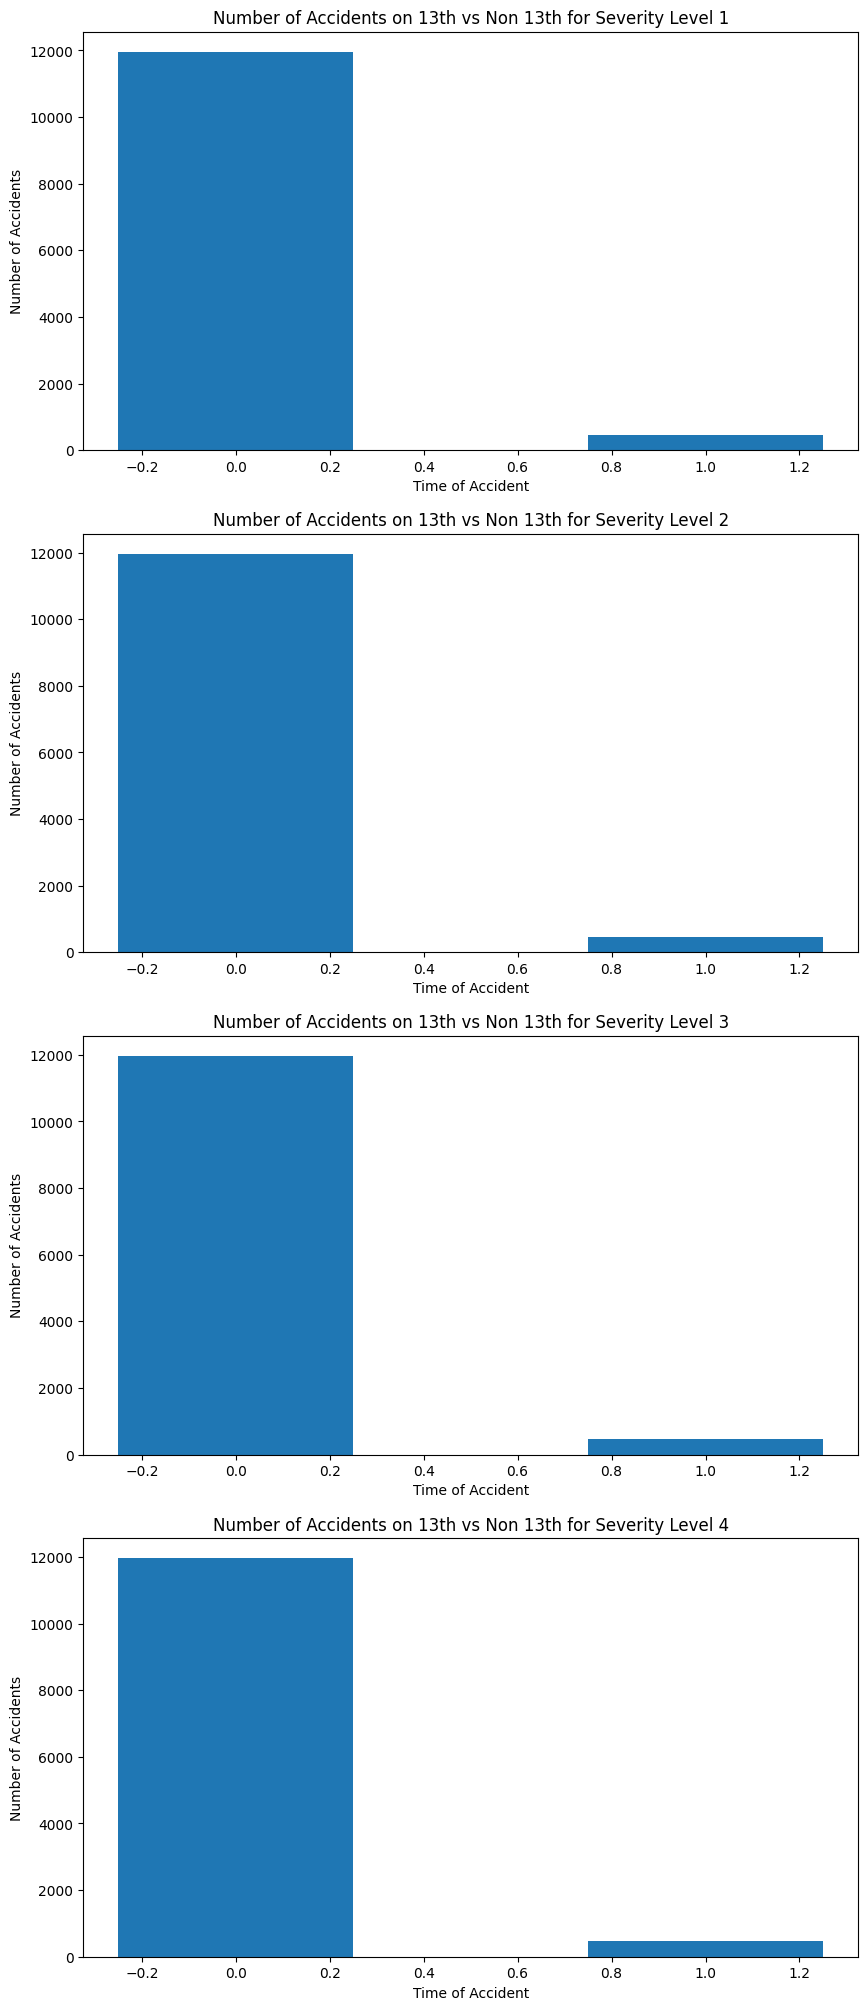

In [6]:
# your code starts here #
# 4 bars with 4 levels severity levels
# bar represents the number of accidents on the 13th and non 13th
fig = plt.figure(figsize=(10, 25))

for i in range(1,5):
  plt.subplot(4, 1, i)

  severity_data = accident[accident['Severity'] == i]
  number_accidents = accident['is_13th'].value_counts()

  plt.bar(number_accidents.index, number_accidents.values, width=0.5)
  plt.ylabel("Number of Accidents")
  plt.xlabel("Time of Accident")
  plt.title(f"Number of Accidents on 13th vs Non 13th for Severity Level {i}")
plt.show()
# end #

## Q1 (c)

In [7]:
# your code starts here #
# find the specific cities with the lowest number of records
low_records = accident['City'].value_counts().nsmallest(3)
# copy accident
accident_copy = accident.copy()
# filter for these cities
filtered_records = accident_copy[accident_copy['City'].isin(low_records.index)]
# get correlation matrix between
corr_arr = filtered_records.corr(method='pearson', numeric_only=True)
index = np.array(corr_arr.index)
columns = np.array(corr_arr.columns)
corr_arr = corr_arr.values
corr_arr
# end #

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan,  1., nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

## Q1(d)

In [8]:
# your code starts here #
# convert the severity column to serious levels
conditions = [
    accident['Severity'] == 1,
    accident['Severity'] == 2,
    accident['Severity'] == 3
]
choices = ['most serious', 'very serious', 'serious']
accident['Severity'] = np.select(conditions, choices, default='light')

# crosstab
crosstab = pd.crosstab(accident['Severity'], accident['Crossing'], normalize='index')
crosstab
# end #

Crossing,False,True
Severity,,
light,0.938462,0.061538
most serious,0.650000,0.350000
serious,0.963087,0.036913
very serious,0.861770,0.138230


Text(0, 0.5, 'Proportion')

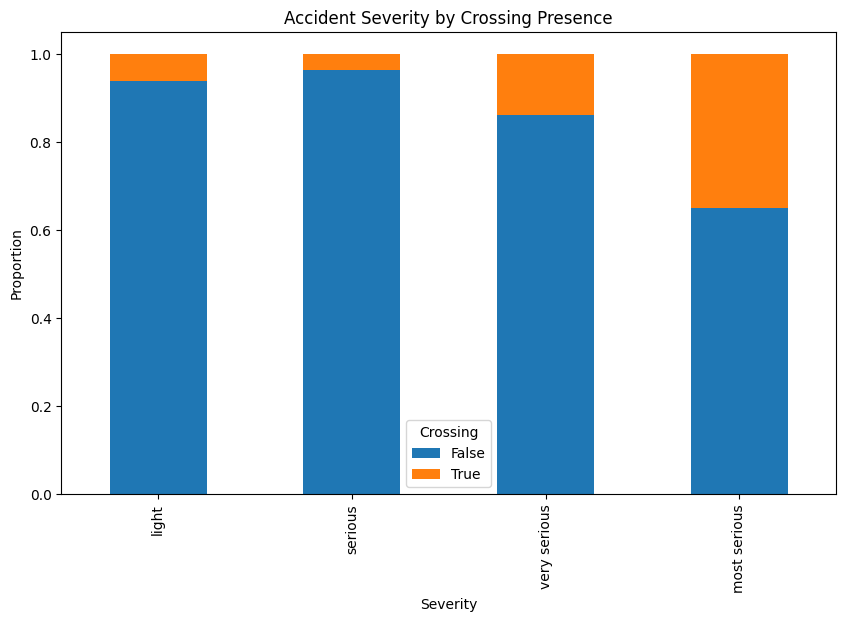

In [9]:
# DO NOT modify the code,
# UNCOMMEND it until you finish Q1d

order = ["light", "serious", "very serious", "most serious"]
crosstab = crosstab.reindex(order)
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accident Severity by Crossing Presence")
plt.xlabel("Severity")
plt.ylabel("Proportion")

# Q2

In [10]:
# Do NOT modify this block of code

# loading in the data
google_playstore_df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/googleplaystore.csv")

print(google_playstore_df.shape)
google_playstore_df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Cleaning the Data

In [11]:
# Do NOT modify this block of code
google_playstore_df[google_playstore_df['Category'] == '1.9'] # corrupted row

# Dropping the corrupted row
google_playstore_df = google_playstore_df.drop(10472, axis=0)
google_playstore_df.shape


(10840, 13)

In [12]:
# Do NOT modify this block of code
google_playstore_df.isnull().sum() / google_playstore_df.shape[0] # % of null values per column

,0
App,0.000000
Category,0.000000
Rating,0.135978
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.000092
Price,0.000000
Content Rating,0.000000
Genres,0.000000


In [13]:
# Do NOT modify this block of code

# Dropping rows with null values
google_playstore_df = google_playstore_df.dropna(axis=0)

print(f"Number of missing values is: {google_playstore_df.isnull().sum().sum()}, shape of data is: {google_playstore_df.shape}")
google_playstore_df.head()

Number of missing values is: 0, shape of data is: (9360, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
# Do NOT modify this block of code
google_playstore_df.dtypes # checking the data types

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [15]:
# Do NOT modify this block of code
google_playstore_df.nunique() # checking the number of unique values per feature

,0
App,8190
Category,33
Rating,39
Reviews,5990
Size,413
Installs,19
Type,2
Price,73
Content Rating,6
Genres,115


In [16]:
# Do NOT modify this block of code
def format_number(num: str) -> float:
    """Function to format a number by converting the place value from string to number e.g 1k to 1000, 1M to 1000000
    """
    num = num.lower() # convert to lowercase

    # if str number can be converted to float without further cleanup, convert it and return it
    try:
        return float(num.strip())
    except ValueError:
        pass

    # if after relacing the place value with number, num is still not convertible to float, return Nan e.g 'Varies with device' in Size column
    try:
        float(num[:-1].strip())
    except ValueError:
        return np.nan

    # else, replace the str place value by multiplying by the appropriate multiple of 10
    suffix_mapper = {'k': 1E3, 'm': 1E6, 'g': 1E9}

    return float(num[:-1]) * suffix_mapper[num[-1]]

In [17]:
# Do NOT modify this block of code
def format_place_value(num: str) -> str:
    """Function to format a number by converting it to its abbreviated place value e.g 1000 to 1k, 1000000 to 1M
    """
    num = int(num.strip("+").strip().replace(",", ""))

    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}G+"

    if num >= 1_000_000:
        return f"{num // 1_000_000}M+"

    if num >= 1000:
        return f"{num // 1000}k+"

    return f"{num}+"

In [18]:
# Do NOT modify this block of code
google_playstore_df['Log-Reviews'] = np.log(google_playstore_df.loc[:, 'Reviews'].astype(int)) # Converting 'reviews' column to float and taking the log

google_playstore_df['Price'] = google_playstore_df['Price'].apply(lambda x: float(x.strip("$"))) # stripping $ and converting price to float

google_playstore_df['Last Updated'] = pd.to_datetime(google_playstore_df['Last Updated']) # converting 'Last Updated' to datetime object

google_playstore_df['Size'] = google_playstore_df['Size'].apply(format_number) # formating 'Size'. Note that after formatting, Nan values actually
                                                                               # indicate that the 'Size' varies with device.

google_playstore_df['Installs'] = google_playstore_df['Installs'].apply(format_place_value) # formatting 'Installs'

google_playstore_df['is_good_rating'] = google_playstore_df.loc[:, 'Rating'].apply(lambda x: 1 if x >= 4 else 0) # creating rating category

google_playstore_df["Install dummy"] = google_playstore_df["Installs"].apply(lambda x:  "Low" if len(x) <=4  else "High")

In [19]:
# Do NOT modify this block of code
google_playstore_df.head() # checking the head of the cleaned data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log-Reviews,is_good_rating,Install dummy
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10k+,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,5.068904,1,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500k+,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,6.874198,0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5M+,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,11.379508,1,Low
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50M+,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,12.281384,1,Low
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100k+,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6.874198,1,High


## Q2(a)

In [20]:
# Do NOT modify this block of code
continuous_cols = ['Rating', 'Log-Reviews', 'Size', 'Price']

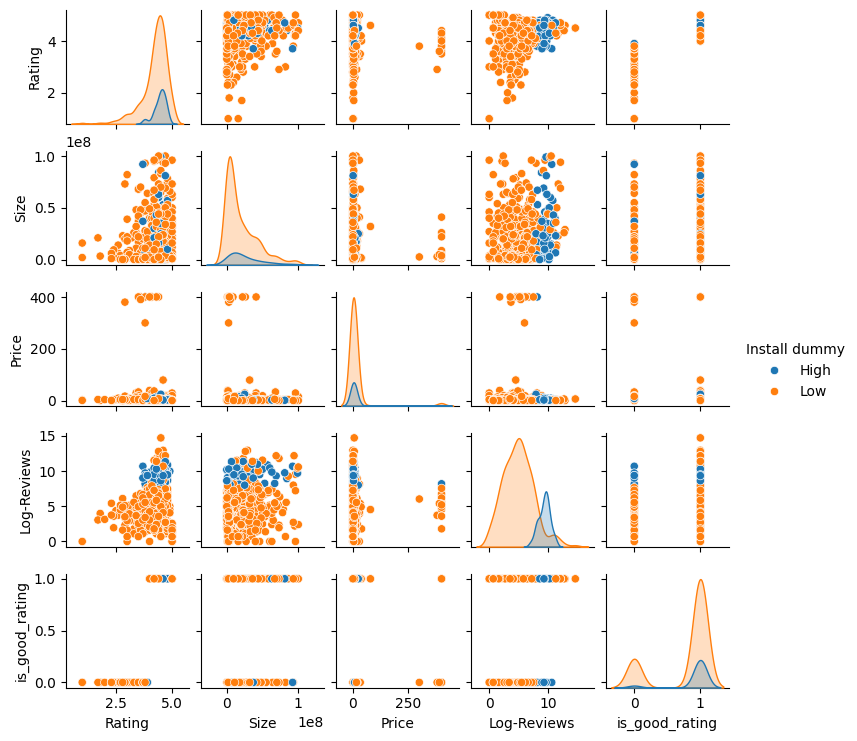

In [21]:
# Your code starts here ##
# create subset containing only rows where the app is not free
non_free_apps = google_playstore_df[google_playstore_df['Price'] != 0]
# take continuous_cols and remove Rating
plot_vars = [col for col in continuous_cols if col != 'Rating']
# pairplot
sns.pairplot(non_free_apps, hue="Install dummy", height=1.5);


## end ##

## Q2(b)

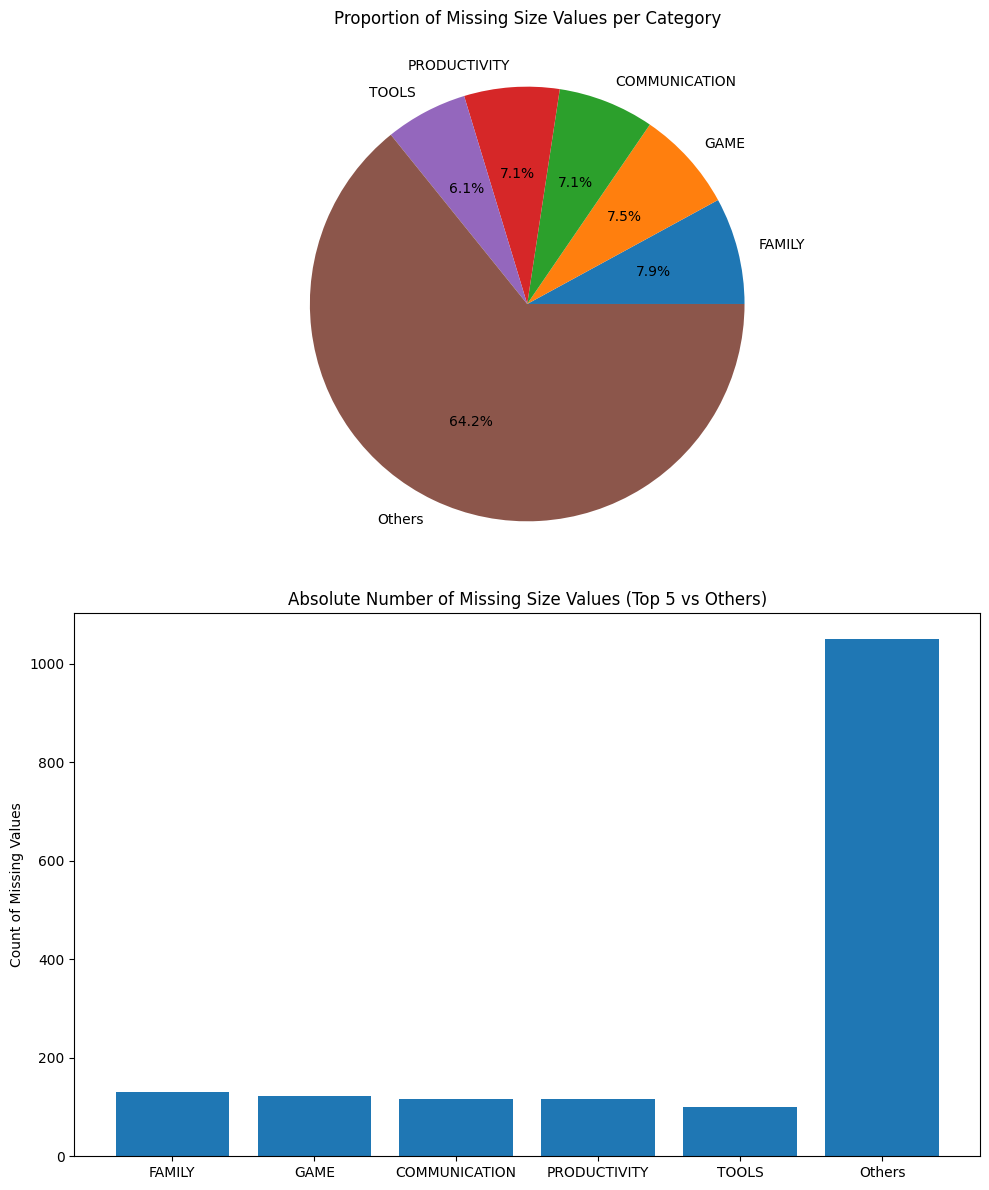

In [24]:
## Your code starts here ##


# Create the 2x1 grid
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Prepare data for plotting
labels = top_five.index.tolist() + ['Others']
sizes = top_five.values.tolist() + [others]

# Top Plot: Pie Chart
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%')
axes[0].set_title("Proportion of Missing Size Values per Category")

# Bottom Plot: Bar Chart
# Note: top_five is already sorted in descending order by nlargest
axes[1].bar(labels, sizes)
axes[1].set_title("Absolute Number of Missing Size Values (Top 5 vs Others)")
axes[1].set_ylabel("Count of Missing Values")

# Use tight_layout to prevent the plots from overlapping
plt.tight_layout()
plt.show()
## end ##
